In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv


In [30]:
# read the csv data

with open('boston_housing.csv','r') as file:
    headers = next(file)
    X = np.array(list(csv.reader(file)),dtype=float)
# last column in dataset is our target
Y = X[:,-1]
# and we want to drop the last column from the dataset
X = np.delete(X, -1, axis=1)

# we need to insert X0 column in the beginning which is initially 1
X = np.insert(X,0,1,axis=1)

In [31]:
# training sample number
m = X.shape[0]

# features number
n = X.shape[1]

In [32]:
hypothesis =lambda THET :  X @ THET 

In [42]:
cost = lambda THETA:  1/(2*m) * np.transpose(X @ THETA - Y) @ (X @ THETA - Y)
# expand transpose to simplify
cost = lambda THETA:  1/(2*m) * ( (X @ THETA).T - Y.T) @ (X @ THETA - Y)
# JUST LIKE ANY ALGEBRAIC statement expand the brackets
cost = lambda THETA:  1/(2*m) * ((X @ THETA).T @ (X @ THETA)) - ((X @ THETA).T @ Y) - (Y.T @ (X @ THETA)) + (Y.T @ Y)
# X : m x n
# Y : m x 1
# THETA : n x 1
#  X @ THETA : m x 1
#  (X @ THETA).T : 1 x m
#  (X @ THETA).T @ Y : 1 x 1
# this means that the second term is a scalar
# the transpose of scalar is the scalar itself
# ((X @ THETA).T @ Y ).T = Y.T @ (X @ THETA)
# this means that we can write the second term as the third term
cost = lambda THETA:  1/(2*m) * ((X @ THETA).T @ (X @ THETA)) - 2 * (Y.T @ (X @ THETA)) + (Y.T @ Y)
# lastly expand the transpose in the first term
cost = lambda THETA:  1/(2*m) * ((THETA.T @ X.T) @ (X @ THETA)) - 2 * (Y.T @ (X @ THETA)) + (Y.T @ Y)


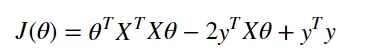

### This is the function that we ended up with after some manipulation!!

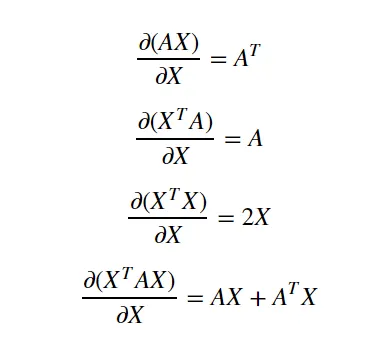

### These are some matrix derivative rule that we can apply in order to get the derivative of the cost function
### NOTE: since we are going to differentiatie with respect to theta we can substitute theta instead of X and find the appropriate derivatives

# DIFFERENTIATION


1. LAST TERM IS A CONTASTANT IN THE THETA WORLD SO DERIVATIVE IS 0
2. SECOND TERM IS THE FIRST RULE OF DERIVATIVE ABOVE (A is Y transpose X AND X is THETA)
3. FIRST TERM IS THE LAST RULE OF DERIVATIVES ABOVE (X is THETA , A is terms in between)

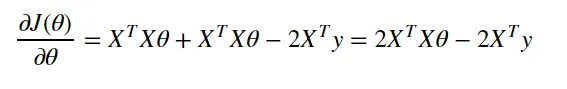
## After differentiation this is what we end up with

In [34]:
# now we want to find the derivative of the cost function using the new definition

# to make it easier we will ignore the constant 1/(2*m) term because it doesn't effect the derivative
cost_derivative = lambda THETA: 2 * (X.T @ X @ THETA) - 2 * (X.T @ Y)

## TO FIND GLOBAL MINIMUM WE ARE GOING TO SET THE DERIVATIVE TO 0
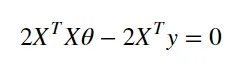

### Move to the other side and cancel 2's
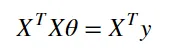

### We can compute THETA by taking the inverse
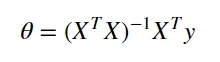

## THIS IS THE VALUE OF THETA THAT WILL GIVE GLOBAL MINIMUM

In [35]:
optimal_THETA = np.linalg.inv(X.T @ X) @ (X.T @ Y)